In [1]:
from jax import grad
import jax.numpy as jnp
from IPython.core.display import HTML
#this css file can be downloaded from [David's repo](https://github.com/ketch/PseudoSpectralPython/blob/master/custom.css)
#Then set the address of css file as per your address of file
#Following two commands are not needed for calculations.
css_file = '/Users/rajvanmp/Downloads/custom.css'

#HTML(open(css_file, "r").read())

In [2]:
from scipy import integrate
import sympy as sp
import numpy as np
import sys
from numpy import linalg as la 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
matplotlib.rcParams['animation.embed_limit'] = 2**128


HTML(open(css_file, "r").read())
font = {'size'   : 15}
matplotlib.rc('font', **font)
#from RKSchemes import ImEx_schemes

fft = np.fft.fft
ifft = np.fft.ifft

from IPython.display import HTML
css_file = '/Users/rajvanmp/Downloads/custom.css'

In [3]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

In [6]:
def test(x,n="real"):
    if n=="real":
        return jnp.real(jnp.exp(1j*x))
    else:
        return jnp.imag(jnp.exp(1j*x))
dx_test = grad(test)

In [19]:
x = jnp.pi/2.0
y = dx_test(x,"real")
print(dx_test(x,"real"),jnp.sin(x),np.sin(x))
type(np.array(y))

-1.0 1.0 1.0


numpy.ndarray

In [4]:




fft = np.fft.fft
ifft = np.fft.ifft


<class 'numpy.ndarray'> complex128


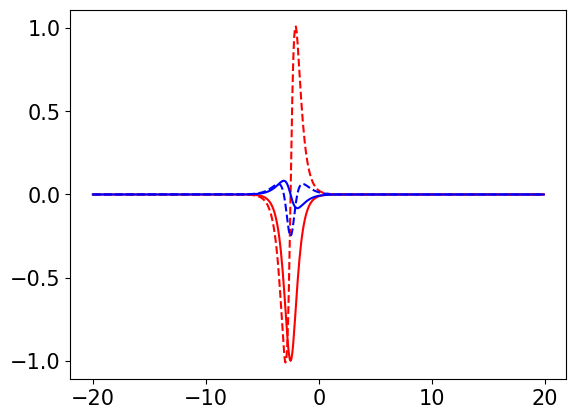

In [60]:
kppa = 8.0
a= kppa*kppa/16.0
c = 0.5
xo = -2.5
import jax



L = 2*20.0; m = 512
x = np.arange(-m/2,m/2)*(L/m)
xi = np.fft.fftfreq(m)*m*2*np.pi/L



def exact_soln_np(t,x):
    bta=-kppa
    omg = np.sqrt(a)*((x-xo)-c*t)
    #print("omg shape",omg.shape)
    f = (2.0*a/bta)/np.cosh(omg)
    thta = 0.5*c*(x-xo) - (0.25*c*c -a)*t
    
    sol = f*np.cos(thta)+1j*f*np.sin(thta)
    
    return(sol)

def exact_soln_real(t,x,a=a,c=c,xo=xo,kppa=kppa):
    bta = - kppa
    omg = np.sqrt(a)*((x-xo)-c*t)
    #print("omg shape",omg.shape)
    f = (2.0*a/bta)/jnp.cosh(omg)
    thta = 0.5*c*(x-xo) - (0.25*c*c -a)*t
    
    sol = f*jnp.cos(thta)
    
    return(sol)
def exact_soln_imag(t,x,a=a,c=c,xo=xo,kppa=kppa):
    bta = - kppa
    omg = np.sqrt(a)*((x-xo)-c*t)
    #print("omg shape",omg.shape)
    f = (2.0*a/bta)/jnp.cosh(omg)
    thta = 0.5*c*(x-xo) - (0.25*c*c -a)*t
    
    sol = f*jnp.sin(thta)
    
    return(sol)

#sol = jax.vmap(exact_soln)

t_ini = 0.0
xj = jnp.array(x)
#gsol_real =  grad(exact_soln_real,1)
#gsol_imag =  grad(exact_soln_imag,1)
gsol_real =  jax.vmap(grad(exact_soln_real,1),(0,0))
gsol_imag =  jax.vmap(grad(exact_soln_imag,1),(0,0))

dx_sol_real=gsol_real(t_ini*np.ones_like(x),xj)
dx_sol_imag=gsol_imag(t_ini*np.ones_like(x),xj)
dx_sol = np.array(dx_sol_real)+1j*np.array(dx_sol_imag)

sol_real = exact_soln_real(t_ini*np.ones_like(x),xj)
sol_imag = exact_soln_imag(t_ini*np.ones_like(x),xj)
sol = np.array(sol_real)+1j*np.array(sol_imag)
print(type(sol),sol.dtype)


amp = np.square(sol_real)+np.square(sol_imag)
npsol = np.square(np.abs(exact_soln_np(np.zeros_like(x),x)))

plt.plot(xj,np.real(sol),"r-")
plt.plot(xj,np.real(dx_sol),"r--")
plt.plot(xj,np.imag(sol),"b-")
plt.plot(xj,np.imag(dx_sol),"b--")

<class 'numpy.ndarray'> complex128


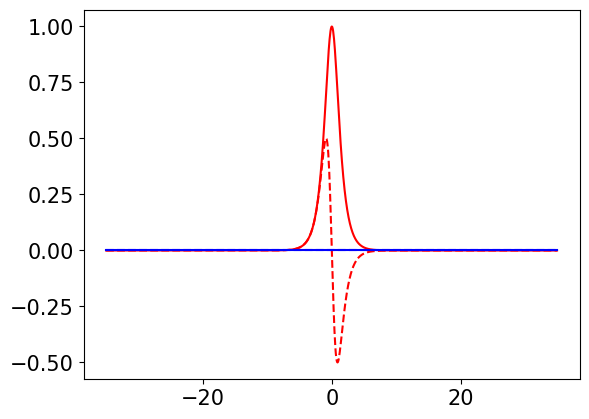

In [136]:
# Different casese
q = 18; sol = 3; inv = 1
kppa = q

if q == 8 and sol == 2 and inv == 1: 
    xL = -35; xR = 35; L = xR-xL; m1 = 16; N =m1*L; t0 = 0; DT = [0.01,0.01]; SP_DT = [0.01,0.01]; T = 5
elif q == 18 and sol == 3 and inv == 1: 
    xL = -35; xR = 35; L = xR-xL; m1 = 32; N =m1*L; t0 = 0; DT = [0.01,0.01]; SP_DT = [0.01,0.01] ; T = 5

m = 1024
x = np.arange(-m/2,m/2)*(L/m)
xi = np.fft.fftfreq(m)*m*2*np.pi/L

def NLS_True_Sol(t,x,q):
    #N = len(x)
    if q == 2:
        ut = jnp.exp(1j*t)/jnp.cosh(x)
    elif q == 8:
        sechx = 1./jnp.cosh(x)
        ut = jnp.exp(1j*t)*sechx*( 1+(3/4)*sechx**2*(jnp.exp(8*1j*t)-1) )/( 1-(3/4)*sechx**4*jnp.sin(4*t)**2 )
    elif q == 18:
        ut = (2*(3*jnp.exp(t*25*1j)*jnp.exp(x) + 15*jnp.exp(t*9*1j)*jnp.exp(9*x) + 48*jnp.exp(t*25*1j)*jnp.exp(7*x) + 48*jnp.exp(t*25*1j)*jnp.exp(11*x) + 24*jnp.exp(t*33*1j)*jnp.exp(3*x) + 54*jnp.exp(t*33*1j)*jnp.exp(5*x) + 3*jnp.exp(t*25*1j)*jnp.exp(17*x) + 54*jnp.exp(t*33*1j)*jnp.exp(13*x) + 24*jnp.exp(t*33*1j)*jnp.exp(15*x) + 135*jnp.exp(t*41*1j)*jnp.exp(9*x) + 30*jnp.exp(t*49*1j)*jnp.exp(5*x) + 120*jnp.exp(t*49*1j)*jnp.exp(7*x) + 120*jnp.exp(t*49*1j)*jnp.exp(11*x) + 30*jnp.exp(t*49*1j)*jnp.exp(13*x) + 60*jnp.exp(t*57*1j)*jnp.exp(9*x)))/(3*(jnp.exp(t*24*1j) + 10*jnp.exp(6*x) + 10*jnp.exp(12*x) + 45*jnp.exp(t*8*1j)*jnp.exp(8*x) + 45*jnp.exp(t*8*1j)*jnp.exp(10*x) + 18*jnp.exp(t*16*1j)*jnp.exp(4*x) + 9*jnp.exp(t*24*1j)*jnp.exp(2*x) + 18*jnp.exp(t*16*1j)*jnp.exp(14*x) + 64*jnp.exp(t*24*1j)*jnp.exp(6*x) + 36*jnp.exp(t*24*1j)*jnp.exp(8*x) + 36*jnp.exp(t*24*1j)*jnp.exp(10*x) + 64*jnp.exp(t*24*1j)*jnp.exp(12*x) + 18*jnp.exp(t*32*1j)*jnp.exp(4*x) + 9*jnp.exp(t*24*1j)*jnp.exp(16*x) + jnp.exp(t*24*1j)*jnp.exp(18*x) + 18*jnp.exp(t*32*1j)*jnp.exp(14*x) + 45*jnp.exp(t*40*1j)*jnp.exp(8*x) + 45*jnp.exp(t*40*1j)*jnp.exp(10*x) + 10*jnp.exp(t*48*1j)*jnp.exp(6*x) + 10*jnp.exp(t*48*1j)*jnp.exp(12*x)))  
    
    
    return ut

def exact_soln_real(t,x,q):
    return jnp.real(NLS_True_Sol(t,x,q))    
def exact_soln_imag(t,x,q):
    return jnp.imag(NLS_True_Sol(t,x,q))    
def exact_soln_np(t,x,q):
    return np.array(NLS_True_Sol(t,x,q))



t_ini = 0.0
xj = jnp.array(x)
#gsol_real =  grad(exact_soln_real,1)
#gsol_imag =  grad(exact_soln_imag,1)
gsol_real =  jax.vmap(grad(exact_soln_real,1),(0,0,None))
gsol_imag =  jax.vmap(grad(exact_soln_imag,1),(0,0,None))

dx_sol_real=gsol_real(t_ini*np.ones_like(x),xj,2)
dx_sol_imag=gsol_imag(t_ini*np.ones_like(x),xj,2)
dx_sol = np.array(dx_sol_real)+1j*np.array(dx_sol_imag)

sol_real = exact_soln_real(t_ini*np.ones_like(x),xj,2)
sol_imag = exact_soln_imag(t_ini*np.ones_like(x),xj,2)
sol = np.array(sol_real)+1j*np.array(sol_imag)

amp = np.square(sol_real)+np.square(sol_imag)
npsol = np.square(np.abs(exact_soln_np(np.zeros_like(x),x,2)))

print(type(sol),sol.dtype)
plt.plot(xj,np.real(sol),"r-")
plt.plot(xj,np.real(dx_sol),"r--")
plt.plot(xj,np.imag(sol),"b-")
plt.plot(xj,np.imag(dx_sol),"b--")

#plt.plot(xj,dx_sol)


In [137]:
print(type(sol),type(dx_sol))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


1024


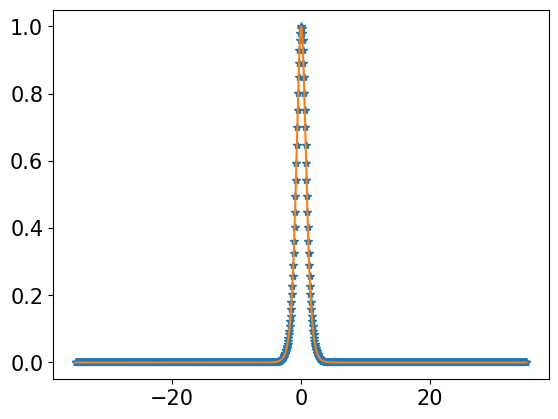

In [138]:








#u0 = np.zeros(2*m)

q0_ini  = sol
q1_ini  = dx_sol
vh = np.real(q0_ini)
wh = np.imag(q0_ini)

ph = np.real(q0_ini)
qh = np.imag(q0_ini)

u_ini = np.stack((q0_ini,q1_ini),axis=1)




plt.plot(x,np.square(np.abs(u_ini[:,0])),"*")
plt.plot(x,npsol)
print(len(xi))

In [139]:
def rhs_linear(uft,u,xi,tau,kppa):
    #Evaluate the linear term
    m = len(xi)
    #rho = u[:m]; q = u[m:];
    q0 = u[:,0]
    q1 = u[:,1]
    v = np.zeros_like(u)
    q0hat = uft[:,0]
    q1hat = uft[:,1]
    q0_x = ifft(1j*xi*q0hat)
   #q0_xx = ifft(-xi*xi*q0hat)
    q1_x = ifft(1j*xi*q1hat)
    rhs_q0 = 1j*q1_x
    rhs_q1 = 1j*(-q0_x+q1)/tau
    v[:,0] = rhs_q0; v[:,1] = rhs_q1
    return v

In [140]:
def rhs_nonlinear(u,uft, xi,tau,kppa):
    #Evaluate the nonlinear term
    m = len(xi)
    q0 = u[:,0]; q1 = u[:,1]
    v = np.zeros_like(u)
    q0_rhs = 1j*kppa*np.square(np.abs(q0))*q0
    q1_rhs = np.zeros_like(q0_rhs)
    
    v[:,0] = q0_rhs; v[:,1] = q1_rhs
    return v

In [141]:
sys.path.append('/Users/rajvanmp/station_X/pyGP_fields')

In [142]:
from GPE import GPE_scalar_field
from GPE import ImEx
from GPE import GPE_scalar_field_1d2c

In [143]:


def setup_tau(imx,dt,tau):
    lmda_list=[]
    for s in range(imx.s):
        impf = imx.im_A[s][s]
        print(s,imx.s)
        omega = xi*dt*impf
        bta = -xi*dt*impf/tau
        chk = np.ones_like(xi)
    
        l = [[[chk[i],omega[i]],[bta[i],(chk[i]-1j*dt*impf/tau)]] for i in range(len(xi))]
    #l = [[[1.0+impf*dt*1j*np.square(xi[i]),0.0 ],[bta[i],(chk[i]-1j*dt)/tau]] for i in range(len(xi))]

        mt = np.array(l)
        lmdamat = np.linalg.inv(mt)

        lmda_list.append(lmdamat)
    print(mt.shape, mt.dtype,lmdamat.shape,q0_ini.shape,q1_ini.shape,u_ini.shape)

    return lmda_list

def run_nls_hyper_example(dt,T,tau,lmda_list):
    
    
    tmax = T

    

    num_plots = 50
    nplt = np.floor((tmax/num_plots)/dt)
    nmax = int(round(tmax/dt))
    #print(nplt,"nmax",nmax)
    
   
    mass_ini = np.sum(np.square(np.abs(q0_ini)))

    frames = [u_ini,]
   
    tt = [0,]
    err_l = []
    mass_l = []
    mass_err_l=[]
    
    rhoq = GPE_scalar_field_1d2c(m,2,rhs_linear,rhs_nonlinear,imx,u_ini)
    
    
    for n in range(0,nmax):
        
        #print(n)
        for k in range(imx.s):
            rhoq.update_stage_sum(k,dt)
            
            rhoq.do_fft(k,lmda_list[k],dt)
            
            rhoq.update_K(k,xi,tau,kppa)
           
            
            
            
        rhoq.sum_contributions(dt)
        
        
        
        t = (n+1)*dt
        

        
        
        if np.mod(n,nplt) == 0:
            frames.append(rhoq.psi)
            
            tt.append(t)
            
            #err = sol_err(psi.psi,t,nx,T,max_err)
           # err_l.append(err)
            
           # mass = psi_1.calc_mass()+psi_2.calc_mass()
           # mass_err = (mass-mass_ini)/mass_ini
            
          ##  mass_l.append(mass)
           # mass_err_l.append(mass_err)
            
            print("time ",t/tmax,t)
            


    #err =  sol_err(psi.psi,t,nx,T,max_err)
    #err_l.append(err)
            
   # mass = psi_1.calc_mass()+psi_2.calc_mass()
    #mass_err = (mass-mass_ini)/mass_ini
            
   # mass_l.append(mass)
   # mass_err_l.append(mass_err)
       
    return frames,tt
 

dt=0.0001



A    = np.array([[0,0,0],[5/6.,0,0],[11/24,11/24,0]])
Ahat = np.array([[2./11,0,0],[205/462.,2./11,0],[2033/4620,21/110,2/11]])
b = np.array([24/55.,1./5,4./11])
bhat = b

imx = ImEx(3,Ahat,A,bhat,b)

lmda_list = setup_tau(imx,dt,tau)
tau_list = [0.001,0.01,0.1]
frame_dict_list = []
t_list = []
for tau in tau_list:
    frm,tt = run_nls_hyper_example(dt,T,tau,lmda_list)
    frame_dict_list.append({"frame_list":frm,"t_list":tt})
    


import pickle
case="test"
file_name = case+"_tau_list.pkl"
with open(file_name, 'wb') as f:
    pickle.dump(frame_dict_list,f)

#ldecp = [[[chk[i],-omega[i]],[-bta[i],chk[i]*1j/tau]] for i in range(len(xi))]
#f = np.array([[rho0[i],q0[i]] for i in range(len(x))])
#dtl = -bta+omega
    
#lmdamat = [[-(bta/dtl), omega/dtl],[-(1.0/dtl), 1.0/dtl]]



0 3
1 3
2 3
(1024, 2, 2) complex128 (1024, 2, 2) (1024,) (1024,) (1024, 2)
class shapes (1024, 2) (3, 1024, 2)
my shape (1024, 2) psi shape (1024, 2)
time  2e-05 0.0001
time  0.020020000000000003 0.10010000000000001
time  0.04002 0.2001
time  0.060020000000000004 0.30010000000000003
time  0.08002000000000001 0.4001
time  0.10002 0.5001
time  0.12002000000000002 0.6001000000000001
time  0.14002 0.7001000000000001
time  0.16002 0.8001


/Users/rajvanmp/station_X/pyGP_fields/GPE/GPE_scalar_field_1d2c.py:64: RuntimeWarning: overflow encountered in cast
  self.ex_K[s_cntr,:] = self.ex_rhs(self.f,self.f_t,*args)
/Users/rajvanmp/station_X/pyGP_fields/GPE/GPE_scalar_field_1d2c.py:57: RuntimeWarning: invalid value encountered in multiply
  self.f = self.psi + dt*self.ex_A[s_cntr][i]*self.ex_K[i]+ dt*self.im_A[s_cntr][i]*self.im_K[i]
/Users/rajvanmp/station_X/pyGP_fields/GPE/GPE_scalar_field_1d2c.py:69: RuntimeWarning: invalid value encountered in multiply
  self.psi = self.psi + dt*self.ex_B[i]*self.ex_K[i]+ dt*self.im_B[i]*self.im_K[i]


time  0.18002 0.9001
time  0.20002 1.0001
time  0.22002000000000002 1.1001
time  0.24002000000000004 1.2001000000000002
time  0.26002000000000003 1.3001
time  0.28002000000000005 1.4001000000000001
time  0.30002 1.5001
time  0.32002 1.6001
time  0.34002000000000004 1.7001000000000002
time  0.36002 1.8001
time  0.38002 1.9001000000000001
time  0.40002000000000004 2.0001
time  0.42002000000000006 2.1001000000000003
time  0.44001999999999997 2.2001
time  0.46002 2.3001
time  0.48002 2.4001
time  0.50002 2.5001
time  0.52002 2.6001000000000003
time  0.54002 2.7001
time  0.56002 2.8001
time  0.58002 2.9001
time  0.60002 3.0001
time  0.62002 3.1001000000000003
time  0.64002 3.2001
time  0.66002 3.3001
time  0.6800200000000001 3.4001
time  0.7000200000000001 3.5001
time  0.7200200000000001 3.6001000000000003
time  0.7400200000000001 3.7001000000000004
time  0.76002 3.8001
time  0.78002 3.9001
time  0.80002 4.0001
time  0.8200200000000001 4.1001
time  0.84002 4.2001
time  0.8600200000000001 4.

In [144]:
with open(file_name, 'rb') as f:
    fdict_list = pickle.load(f)

    

In [145]:
print(len(fdict_list))


3


In [146]:
f0 = [np.real(fe[:,0]) for fe in f]
f1 = [np.real(fe[:,1]) for fe in f]
#print(f0[-1].shape,f1[-1].shape)

ValueError: I/O operation on closed file.

In [150]:
def plot_tau_compare(f_list,tau_list,x,xi,exct_fnc,plot_type="real",plot_type2="none",kppa=kppa):
    clist = ["r-","g--","b.--"]
    lablist= [r"$\tau =$" for i in range(len(tau_list)) ]
    lablist= [lablist[i]+str(tau_list[i]) for i in range(len(tau_list))]

    frame_list = [t["frame_list"] for t in f_list]
    tt = f_list[0]["t_list"]
   
    frames_sol = [exct_fnc(t*np.ones_like(x),x,kppa) for t in tt]
    if plot_type=="real":
        frame_list = [np.real(f) for f in frame_list]
        #frames = np.real(frames)
        frames_sol=np.real(frames_sol)
    elif plot_type=="imag":
        frame_list = [np.imag(f) for f in frame_list]
        #frames=np.imag(frames)
        frames_sol = np.imag(frames_sol)
    else:
        frame_list = [np.square(np.abs(f)) for f in frame_list]
        #frames=np.square(np.abs(frames))
        frames_sol = np.square(np.abs(frames_sol))
    fig = plt.figure(figsize=(12,8))
    axes = fig.add_subplot(211)
    axes2 = fig.add_subplot(212)
    line_list  = [ axes.plot(x,frames_sol[0][:],"-*",lw=3,label="sol")[0]]
    line_list2 = []
    for j,f in enumerate(frame_list):
        line_list.append(axes.plot(x,f[0][:,0],clist[j],lw=3,label=lablist[j])[0])
        line_list2.append(axes2.plot(x,f[0][:,1],clist[j],lw=3,label=lablist[j])[0])
    
    
    

    
    
    #axes2.semilogy([xi_max/2.,xi_max/2.],[1.e-6,4e8],'--r')
    #axes2.semilogy([-xi_max/2.,-xi_max/2.],[1.e-8,4e10],'--r')
    
    axes.set_ylabel(r'$q0$',fontsize=30)
    axes2.set_ylabel(r'$q1$',fontsize=30)
    plt.tight_layout()
    axes.legend(loc="best")
    axes2.legend(loc="best")
    plt.close()

    def plot_frame(i):
       
        line_list[0].set_data(x,frames_sol[i][:])
        #power_spectrum = np.abs(uuhat[i])**2
        for j,f in zip(range(len(frame_list)),frame_list):
            line_list[j+1].set_data(x,f[i][:,0])
            line_list2[j].set_data(x,f[i][:,1])

        
        
        
        axes.set_title('t= %.2e' % tt[i])
        axes.set_xlim((-35.0,35.0))
        axes.set_ylim((0.0,4.0))
        axes2.set_xlim((-35.0,35.0))
        axes2.set_ylim((0.0,10.0))

    anim = matplotlib.animation.FuncAnimation(fig, plot_frame,
                                              frames=len(frame_list[0]), interval=100,
                                              repeat=False)
    return HTML(anim.to_jshtml())

In [151]:
plot_tau_compare(fdict_list,tau_list,  x, xi,exct_fnc=exact_soln_np,plot_type="abs")

In [125]:
i=2
fr = fdict_list[0]["frame_list"]
fchk = np.abs(fr[i])
print(type(fchk),fchk.shape)
fchk[:,0]

<class 'numpy.ndarray'> (512, 2)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

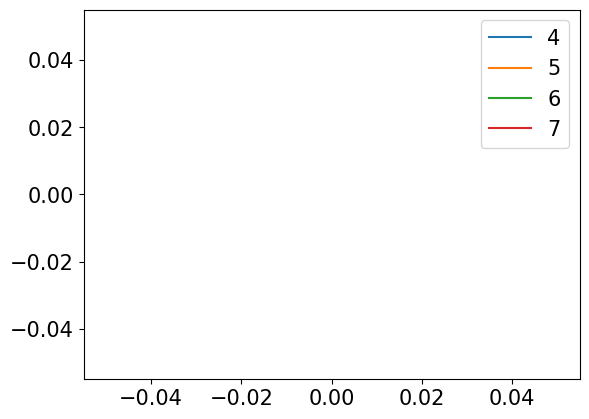

In [120]:
for i in range(4,8):
    plt.plot(x,np.abs(fr[i])[:,0],label=str(i))
plt.legend(loc="best")

In [ ]:
#########################            OLD JUNK Code: not being used    #########################

In [52]:

def plot_solution(frames, x, tt, xi,exct_fnc,plot_type="real",plot_type2="none"):
   
    frames_sol = [exct_fnc(t*np.ones_like(x),x) for t in tt]
    if plot_type=="real":
        frames = np.real(frames)
        frames_sol=np.real(frames_sol)
    elif plot_type=="imag":
        frames=np.imag(frames)
        frames_sol = np.imag(frames_sol)
    else:
        frames=np.square(np.abs(frames))
        frames_sol = np.square(np.abs(frames_sol))
    fig = plt.figure(figsize=(12,8))
    axes = fig.add_subplot(211)
    axes2 = fig.add_subplot(212)
    if plot_type2=="diff":
        line, = axes.plot(x,frames[0][:,0]-frames_sol[0][:],lw=3)
    else:
        line, = axes.plot(x,frames[0][:,0],lw=3,label="bdhdhj")
        linesol,= axes.plot(x,frames_sol[0][:],"--",lw=3)
    line2, = axes2.plot(x,frames[0][:,1],lw=3)

    
    
    #axes2.semilogy([xi_max/2.,xi_max/2.],[1.e-6,4e8],'--r')
    #axes2.semilogy([-xi_max/2.,-xi_max/2.],[1.e-8,4e10],'--r')
    if plot_type2=="diff":
        axes.set_ylabel(r'$q0-u$',fontsize=30)
    else:
        axes.set_ylabel(r'$q0$',fontsize=30)
    axes2.set_ylabel(r'$q1$',fontsize=30)
    plt.tight_layout()
    axes.legend(loc="best")
    plt.close()

    def plot_frame(i):
        if plot_type2=="diff":
            line.set_data(x,frames[i][:,0]-frames_sol[i][:])
        #
        #power_spectrum = np.abs(uuhat[i])**2
        else:
            line.set_data(x,frames[i][:,0])
            linesol.set_data(x,frames_sol[i][:])
        line2.set_data(x,frames[i][:,1])
        axes.set_title('t= %.2e' % tt[i])
        axes.set_xlim((-20.0,20.0))
        axes.set_ylim((-1.0,1.0))
        axes2.set_xlim((-20.0,20.0))
        axes2.set_ylim((-1,10))

    anim = matplotlib.animation.FuncAnimation(fig, plot_frame,
                                              frames=len(frames), interval=100,
                                              repeat=False)
    return HTML(anim.to_jshtml())

In [53]:
plot_solution(f_tau_0p001,  x, tt_tau_0p01, xi,exct_fnc=exact_soln_np,plot_type="ss")

/Users/Shared/my_installs/anaconda3/envs/k@ust/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Shared/my_installs/anaconda3/envs/k@ust/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


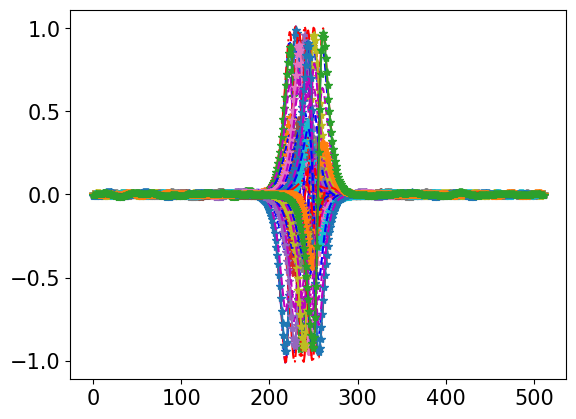

In [19]:
mrk = ("b--","r-.","-*","m--")
for i in range(len(f)):
    ax = plt.subplot()
    j=i%4
    ax.plot(f[i][:,1],mrk[j],label=str(i))

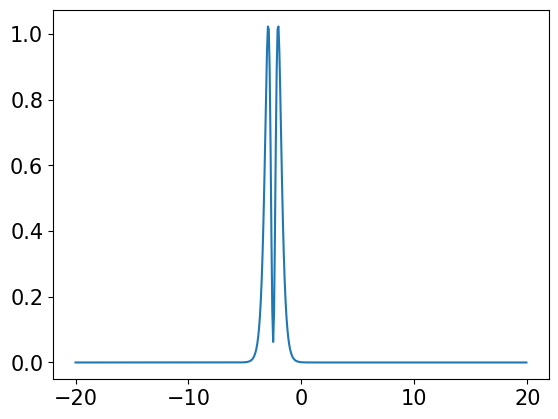

In [20]:
i=0
amp0 = np.square(np.abs(f[i][:,0]))
amp1 = np.square(np.abs(f[i][:,1]))
plt.plot(x,amp1)